In [4]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#load data set

df =pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
#overview of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
#checking missing values

df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
#Descriptive statistics

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
analysis_df = df[["TV", "radio", "newspaper", "sales"]]
analysis_df.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


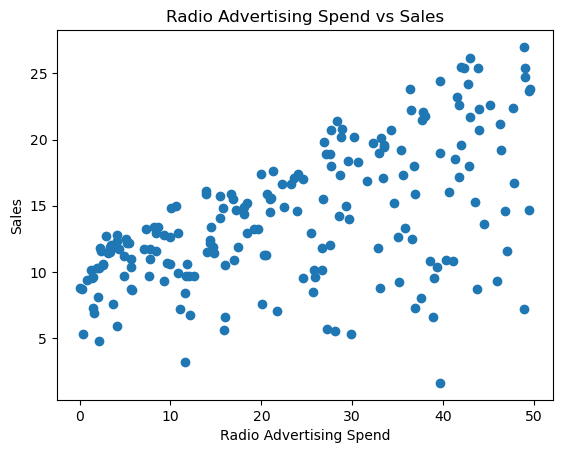

In [15]:
#Ad Spend vs Sales

plt.figure()
plt.scatter(analysis_df["radio"], analysis_df["sales"])
plt.xlabel("Radio Advertising Spend")
plt.ylabel("Sales")
plt.title("Radio Advertising Spend vs Sales")
plt.show()


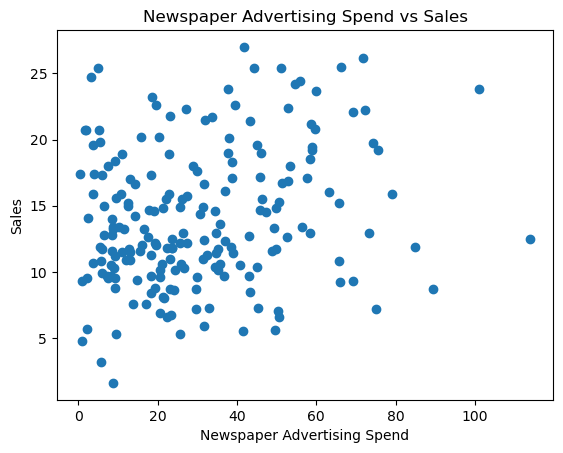

In [16]:
#Newspaper Ad Spend vs Sales

plt.figure()
plt.scatter(analysis_df["newspaper"], analysis_df["sales"])
plt.xlabel("Newspaper Advertising Spend")
plt.ylabel("Sales")
plt.title("Newspaper Advertising Spend vs Sales")
plt.show()


In [ ]:
#correaltion

analysis_df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


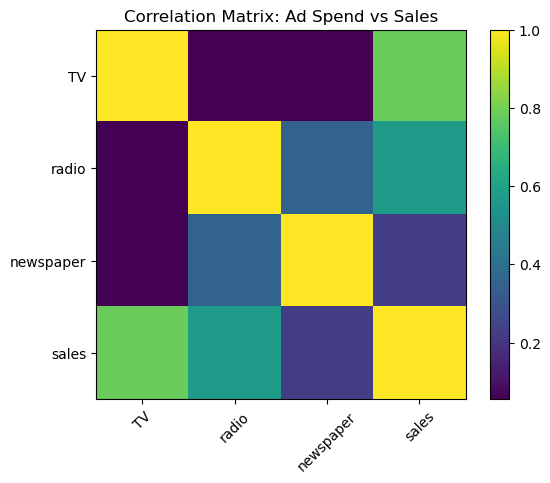

In [18]:
#Correlation Heatmap

corr = analysis_df.corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Matrix: Ad Spend vs Sales")
plt.show()


In [23]:
from sklearn.linear_model import LinearRegression

X = df[["TV"]]
y = df["sales"]

model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_


(array([0.04753664]), np.float64(7.032593549127694))

In [25]:
# Multiple regression controlling for a confounder
X_multi = df[["TV", "radio"]]

model_multi = LinearRegression()
model_multi.fit(X_multi, y)

model_multi.coef_


array([0.04575482, 0.18799423])

In [26]:
comparison = pd.DataFrame({
    "Model": ["TV only", "TV + Radio"],
    "TV Coefficient": [
        model.coef_[0],
        model_multi.coef_[0]
    ]
})

comparison


,Model,TV Coefficient
0,TV only,0.047537
1,TV + Radio,0.045755


In [29]:
np.random.seed(42)

df["seasonality"] = np.random.choice(
    ["Low", "Medium", "High"],
    size=len(df)
)

df.groupby("seasonality")[["TV", "sales"]].mean()


,TV,sales
seasonality,,
High,146.565753,14.313699
Low,148.150000,14.112121
Medium,146.414754,13.577049


In [33]:
for season in df["seasonality"].unique():
    subset = df[df["seasonality"] == season]
    corr = subset["TV"].corr(subset["sales"])
    print(f"{season} season correlation: {corr:.2f}")


High season correlation: 0.82
Low season correlation: 0.72
Medium season correlation: 0.83


In [34]:

confounders = [
    "Seasonality",
    "Channel mix",
    "Brand awareness",
    "Pricing & promotions",
    "Market competition"
]
confounders

['Seasonality',
 'Channel mix',
 'Brand awareness',
 'Pricing & promotions',
 'Market competition']